In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.MET import *
from model.MET_Meta import *

In [4]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/latilong_china.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 1785607/1785607 [00:01<00:00, 1240604.18it/s]


In [5]:
epsilon_list = list(range(25,400,25))
MET_Index_seg_num = []
MET_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    MET_Index = MET(epsilon)
    MET_Index.learn_index_lookahead(data)
    MET_Index_seg_num.append(MET_Index.seg_num)
    MET_Index_mae.append(MET_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 44408/1785607 [00:00<00:03, 444071.95it/s]

7141 6.925336874239404


  3%|▎         | 44694/1785607 [00:00<00:03, 446939.36it/s]

3851 14.137174641452459


  3%|▎         | 45152/1785607 [00:00<00:03, 451515.05it/s]

2732 21.462583872039033


  1%|▏         | 25536/1785607 [00:00<00:06, 255357.81it/s]

2097 28.880752595615945


  2%|▏         | 32266/1785607 [00:00<00:05, 322654.92it/s]

1726 36.27427927869906


  3%|▎         | 45298/1785607 [00:00<00:03, 452972.87it/s]

1511 42.769773527993564


  3%|▎         | 45020/1785607 [00:00<00:03, 450192.92it/s]

1351 49.64343889780898


  2%|▏         | 44183/1785607 [00:00<00:03, 441824.10it/s]

1219 56.53366222242632


  1%|▏         | 24794/1785607 [00:00<00:07, 247937.28it/s]

1112 64.0020094007248


  1%|▏         | 24691/1785607 [00:00<00:07, 246907.29it/s]

1019 71.21830279563196


  1%|▏         | 24935/1785607 [00:00<00:07, 249343.70it/s]

958 78.95881288547815


  1%|▏         | 24426/1785607 [00:00<00:07, 244196.77it/s]

865 86.65960426902448


  1%|▏         | 24822/1785607 [00:00<00:07, 248213.73it/s]

823 93.72581592702089


  1%|▏         | 24699/1785607 [00:00<00:07, 246980.81it/s]

757 100.09568846896322


100%|██████████| 1785607/1785607 [00:03<00:00, 460034.18it/s]

742 105.79398154241107


3.8739078253507615

In [6]:
epsilon_list = list(range(25,400,25))
MET_Meta_Index_seg_num_withBound = []
MET_Meta_Index_mae_withBound = []
MET_Meta_Index_mean_epsilon=[]
MET_Meta_Index_mean_seg_err=[]
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    MET_Meta_Index = MET_Meta(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    MET_Meta_Index.learn_index_lookahead(data)
    MET_Meta_Index_seg_num_withBound.append(MET_Meta_Index.seg_num)
    MET_Meta_Index_mae_withBound.append(MET_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 37279/1785607 [00:00<00:04, 372406.79it/s]

7003 6.804764990280616


  2%|▏         | 37487/1785607 [00:00<00:04, 374862.31it/s]

3700 14.03249203212129


  2%|▏         | 40511/1785607 [00:00<00:04, 405104.59it/s]

2529 21.63941281592198


  2%|▏         | 36100/1785607 [00:00<00:04, 360999.48it/s]

1977 28.83812339445354


  1%|▏         | 23211/1785607 [00:00<00:07, 232108.01it/s]

1650 35.51889189502505


  2%|▏         | 42554/1785607 [00:00<00:04, 425532.29it/s]

1370 42.94177498184091


  1%|▏         | 26470/1785607 [00:00<00:06, 264692.68it/s]

1236 50.19535541695345


  1%|▏         | 23074/1785607 [00:00<00:07, 230736.92it/s]

1156 56.29618331469354


  1%|▏         | 23321/1785607 [00:00<00:07, 233207.44it/s]

1021 64.86892300489413


  0%|          | 0/1785607 [00:00<?, ?it/s]

976 71.87177581629105


  1%|▏         | 23335/1785607 [00:00<00:07, 233343.55it/s]

861 81.98788143191643


  1%|▏         | 23233/1785607 [00:00<00:07, 232324.13it/s]

810 88.46451934832244


  1%|▏         | 23227/1785607 [00:00<00:07, 232268.56it/s]

779 94.16522280658621


  1%|▏         | 23287/1785607 [00:00<00:07, 232863.00it/s]

747 100.58997024541235


100%|██████████| 1785607/1785607 [00:04<00:00, 420613.21it/s]

707 108.37720618254745


4.3541743914286295

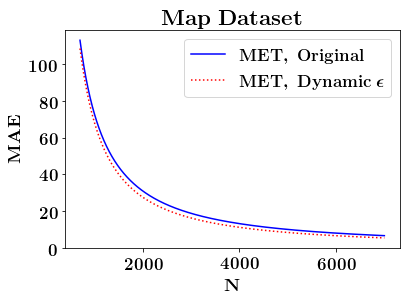

In [15]:
x = np.arange(700,7000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Map~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,MET_Index_seg_num,MET_Index_mae)
p2,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{MET,~Original}$')
#plt.scatter(MET_Index_seg_num, MET_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{MET,~Dynamic~\epsilon}$')
#plt.scatter(MET_Meta_Index_seg_num_withBound, MET_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/MET/Map_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [8]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(140561.89199247517, 125256.22065323754, 0.10888919551578746)